# AE 370 Project 1 - A Numerical Method for a Dynamical System
  
**Group Members:**  
- Elijah Lewis 
- Raghav Mansharamani
- Matthew Greenstein
- Jackson Rees

---


## Repository Structure

```text
AE_370_Project_1/
│
├── source/
│   ├── eoms.py               # Equations of Motion and analysis functions
│   ├── numerical_methods.py  # Integration algorithms (RK4, AB3)
│   ├── convergence_tests.py  # Error and stability validation
│   └── plotting_utils.py     # Visualization and post-processing
│
├── main.ipynb                # Main notebook (this file)
├── data/                     # Initial condition files
├── results/                  # Generated plots and figures
├── README.md
├── project_requirements.pdf
├── requirements.txt
└── .gitignore
```


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Import functions
from source.eoms import *
from source.numerical_methods import *
from source.convergence_tests import *
from source.plotting_utils import *

# Defining the Dynamical System

---

## Initial Conditions and Constants

In [ ]:
# Initial state: x, xdot, theta, thetadot
u0 = [0,    # x     = 0    [m]
      -0.5, # x dot = -0.5 [m/s]
      0.1,  # θ     = 0.1  [rad]
      0]    # θ dot = 0    [rad/s]

# Initial constants: m1, m2, L, k, b, g
m1, m2, L, k, b, g = constants # From data/initial_conditions.py

# Initial values (from data/initial_conditions.py):
'''
m1 = 1070 #kg https://www.issfd.org/ISSFD_2012/ISSFD23_IN1_1.pdf
m2 = 900  #kg https://www.issfd.org/ISSFD_2012/ISSFD23_IN1_1.pdf
L  = 7.62 #m  https://www.smithsonianmag.com/air-space-magazine/how-things-work-dropping-in-on-mars-135812/
k  = 2.0e3#N/m
b  = 3.2e3#kg/s
g  = 3.728#m/s^2 
'''

# Set constants:
constants = (m1,
             m2,
             L,
             k,
             b,
             g)

set_constants(constants)

## Running AB3 Function
---

In [3]:
# Run AB3 for Skycrane undamped and damped
t_final = 100
dt = 0.05
U, T = ab3_solve(skycrane, u0, dt, t_final)
U_damped, T_damped = ab3_solve(skycrane_damping, u0, dt, t_final)

# Visualizing the Systems

---

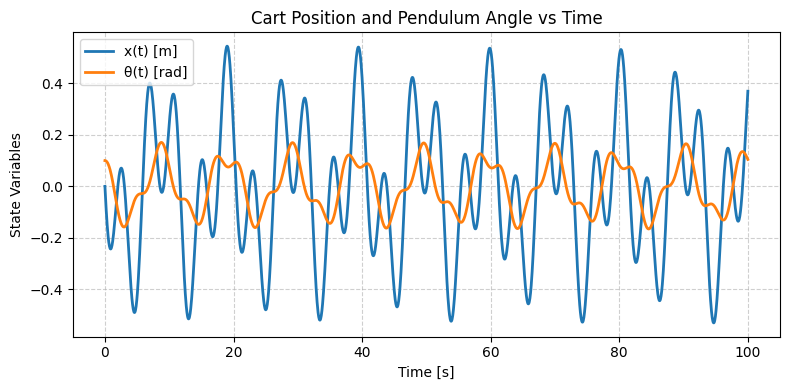

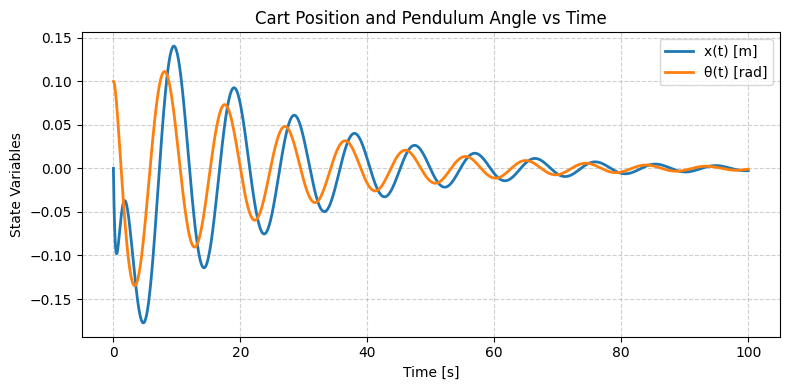

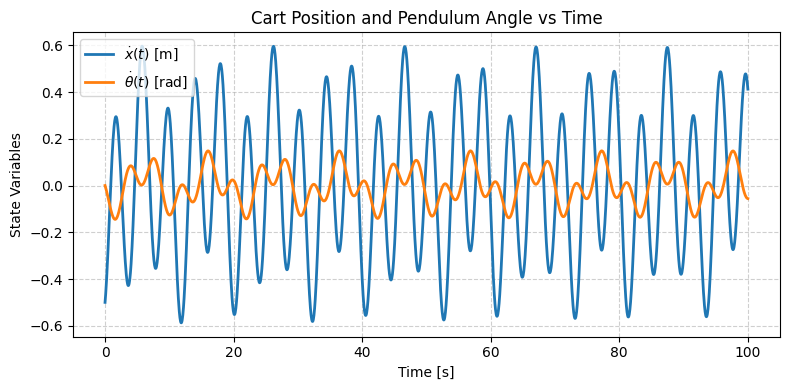

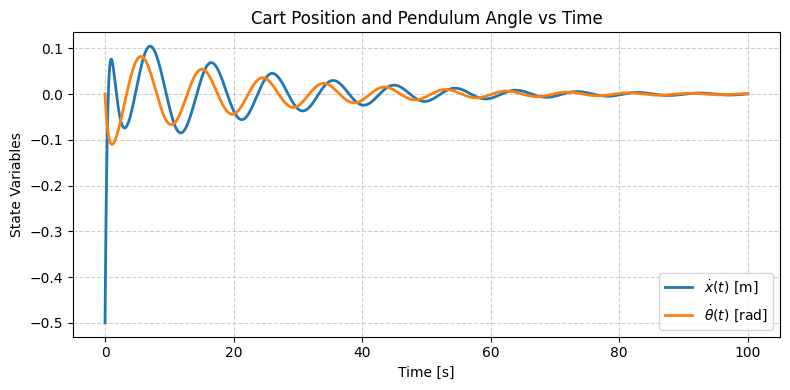

In [4]:
# Plot position and angle vs time using ab3 method
plot_x_theta(T, U)
plot_x_theta(T_damped, U_damped)

# Plot position and angle derivatives vs time using ab3 method
plot_xdot_thetadot(T, U)
plot_xdot_thetadot(T_damped, U_damped)

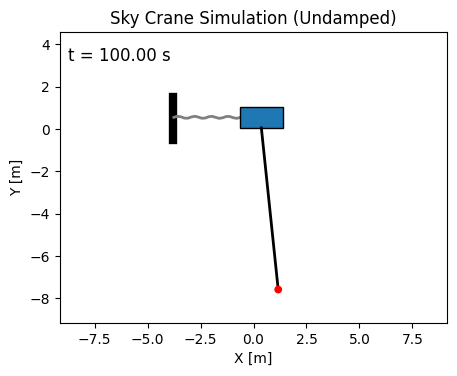

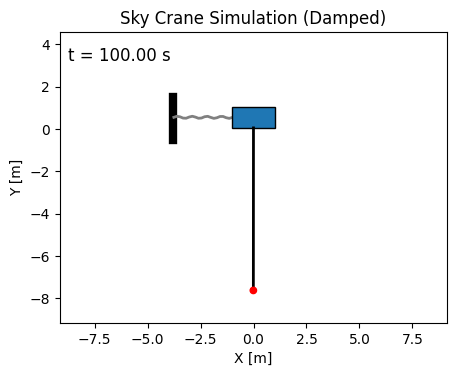

In [5]:
# Create animations of the systems
animate_skycrane(T, U, dt, skip = 10, save_path="results/skycrane.gif", title='Undamped')
animate_skycrane(T_damped, U_damped, dt, skip = 10, save_path="results/skycrane_damped.gif", title='Damped')

# Error Convergence Test for AB3 Method

--- 

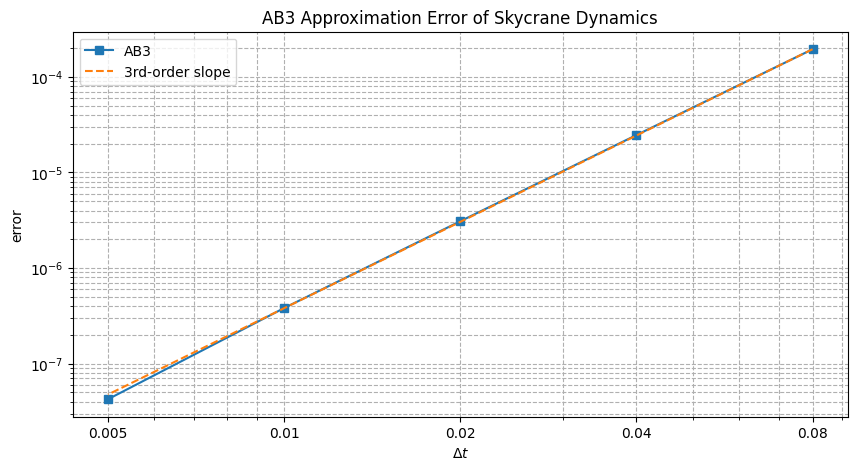

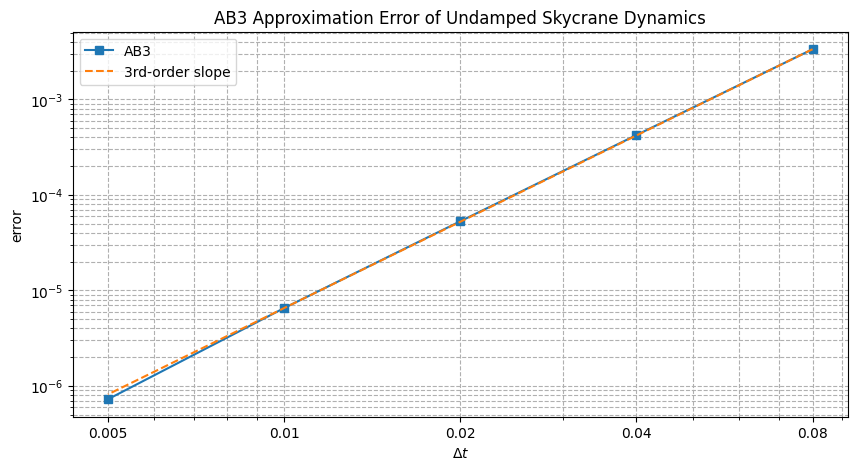

In [6]:
# Error convergence test for AB3 method

delta_t = [8e-2, 4e-2, 2e-2, 1e-2, 5e-3]
delta_t_baseline = 2.5e-3
T_final = 4

error = []
for dt in delta_t:
    e_ab3 = ivp_ab3_error(u0, T_final, dt, delta_t_baseline)
    error.append(e_ab3)

slope = (np.array(delta_t)/delta_t[0])**3 * error[0]

# Damped model

# Plot error along with calculated slope
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.loglog(delta_t, error, label='AB3', marker='s')
ax.loglog(delta_t, slope, '--', label='3rd-order slope')
ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel('error')
ax.set_xticks([8e-2, 4e-2, 2e-2, 1e-2, 5e-3],[8e-2, 4e-2, 2e-2, 1e-2, 5e-3])
ax.legend()
ax.set_title('AB3 Approximation Error of Skycrane Dynamics')
ax.grid(which='both', linestyle='--')
plt.show()

error = []
for dt in delta_t:
    e_ab3 = ivp_ab3_errorundamped(u0, T_final, dt, delta_t_baseline)
    error.append(e_ab3)

slope = (np.array(delta_t)/delta_t[0])**3 * error[0]


# Undamped model

# Plot error along with calculated slope
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.loglog(delta_t, error, label='AB3', marker='s')
ax.loglog(delta_t, slope, '--', label='3rd-order slope')
ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel('error')
ax.set_xticks([8e-2, 4e-2, 2e-2, 1e-2, 5e-3],[8e-2, 4e-2, 2e-2, 1e-2, 5e-3])
ax.legend()
ax.set_title('AB3 Approximation Error of Undamped Skycrane Dynamics')
ax.grid(which='both', linestyle='--')
plt.show()

# Questions

---

## Q1: Effect of Cable Length on Coupled Dynamics

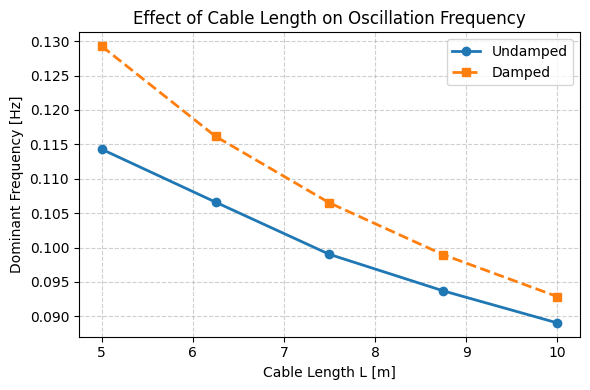

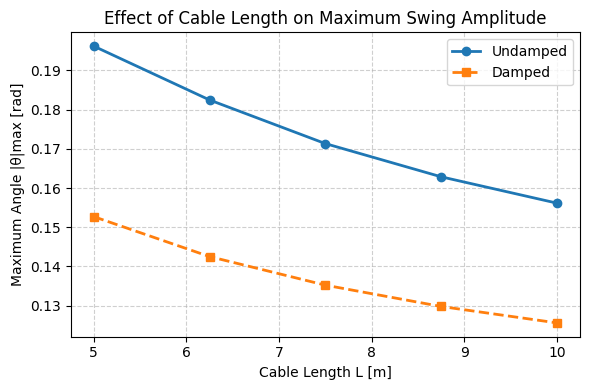

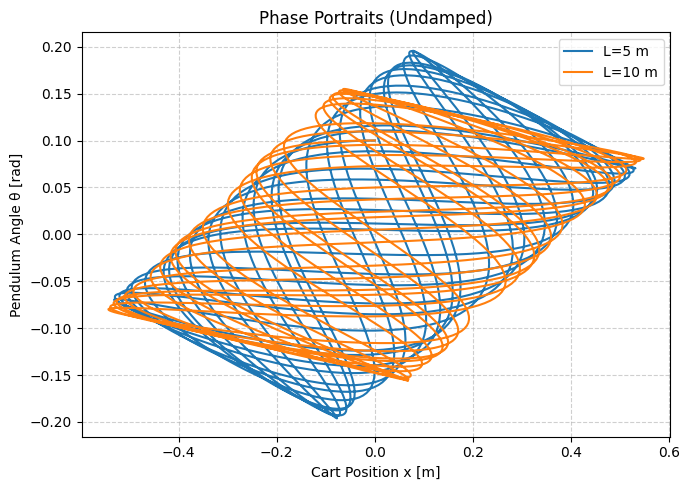

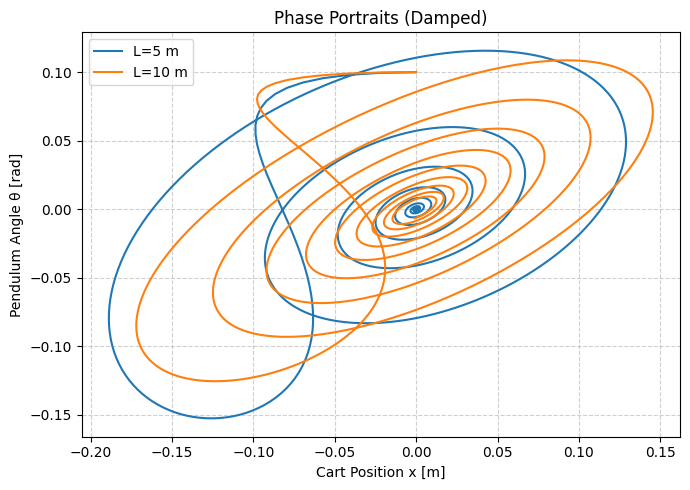

In [7]:
# Simulation controls
dt = 0.05
t_final = 100.0

# Define initial constants
m1_0, m2_0, L0, k0, b0, g0 = constants

# L sweep
L_values = np.linspace(5.0, 10.0, 5)

# AB3
results = sweep_length_effect(L_values, ab3_solve, u0, dt, t_final)

# Figures
plot_frequency_vs_length(results)
plot_amplitude_vs_length(results)
plot_phase_comparison(results, [L_values[0], L_values[-1]])


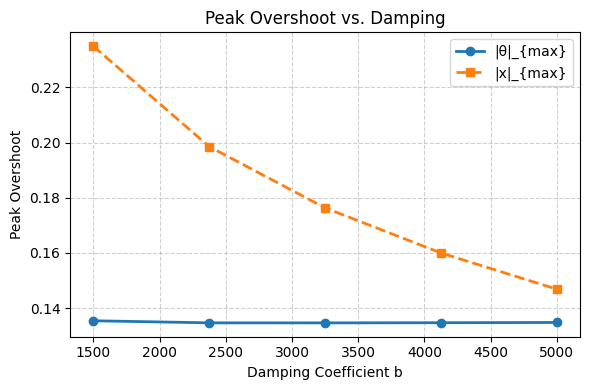

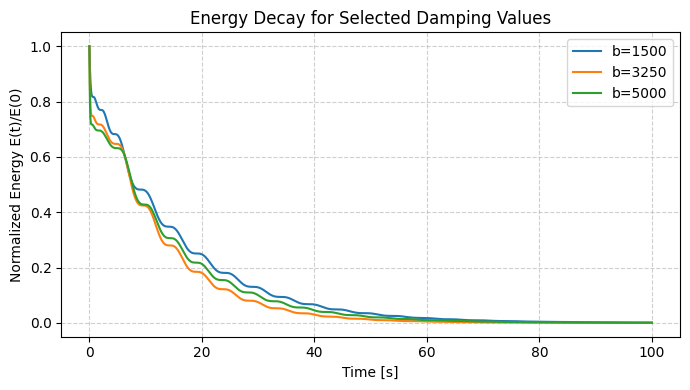

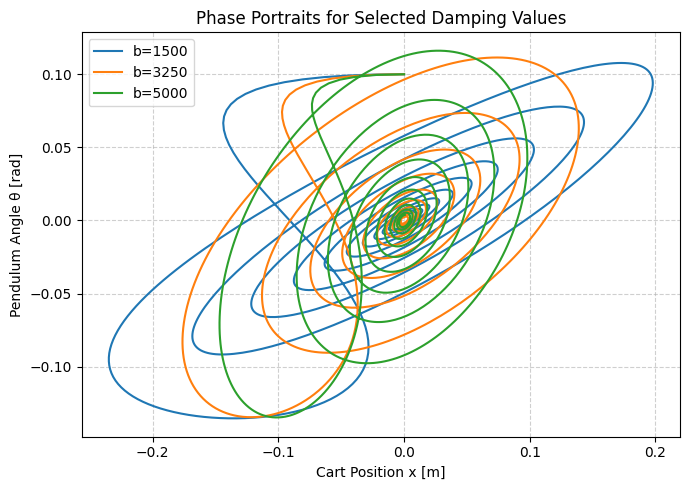

In [8]:
### Q2: Effect of Damping on Stability and Settling Time

# Simulation controls
dt = 0.05
t_final = 100.0

# Sweep b values
b_values = np.linspace(1.5e3,5e3,5)

# Tolerances for "settled"
eps_x = 0.01     # meters
eps_th = 0.01    # radians
dwell = 2.0      # seconds to remain inside band

results_b = sweep_damping_effect(
    b_values, ab3_solve, u0, dt, t_final,
    constants_base=None, eps_x=eps_x, eps_th=eps_th, dwell=dwell
)

# Figures
plot_overshoot_vs_b(results_b)
plot_energy_decay_examples(results_b, [b_values[0], b_values[len(b_values)//2], b_values[-1]])
plot_phase_by_b(results_b, [b_values[0], b_values[len(b_values)//2], b_values[-1]])


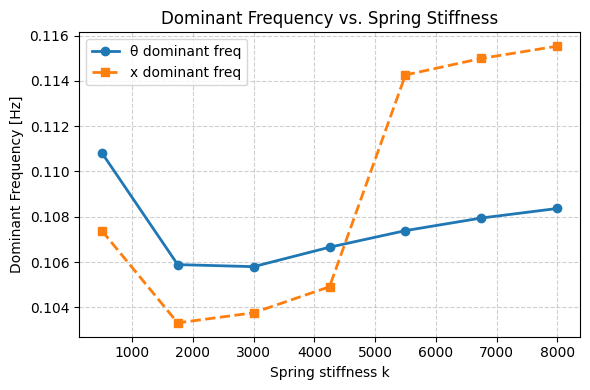

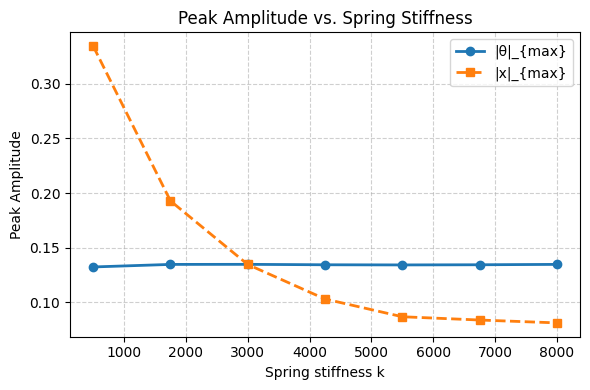

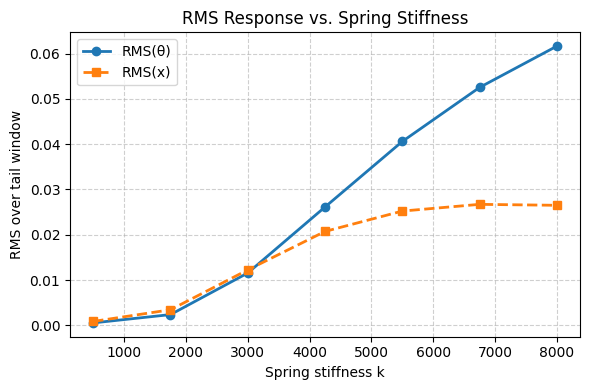

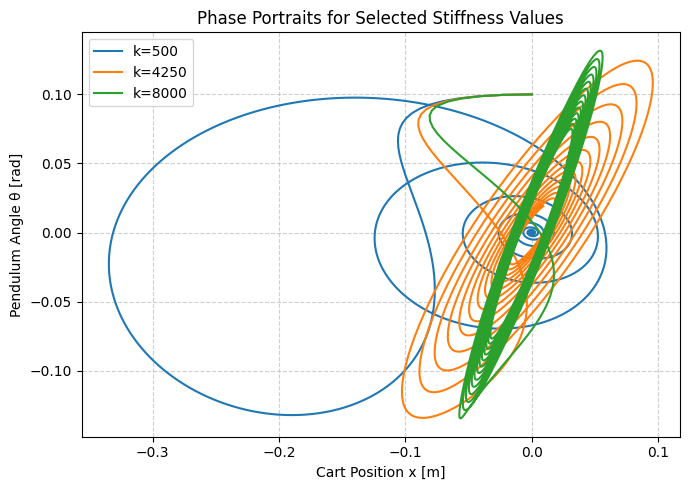

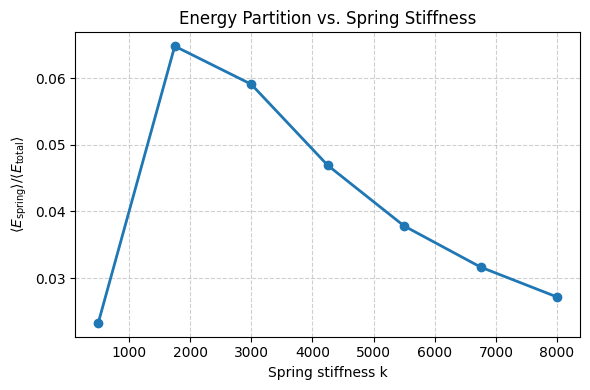

In [ ]:
### Q3: Effect of Spring Stiffness on Oscillations & Response

# Simulation controls
dt = 0.05
t_final = 120.0 # Longer time to analyze the tail behavior

# Sweep k values
k_values = np.linspace(0.25*k0, 4.0*k0, 7)  # 7 points from 0.25x to 4x baseline

results_k = sweep_stiffness_effect(
    k_values, ab3_solve, u0, dt, t_final,
    constants_base=constants, frac_window=0.5  # Compute RMS/energy over last 50%
)

# Figures
plot_frequency_vs_k(results_k)
plot_amplitude_vs_k(results_k)
plot_rms_vs_k(results_k)
# Pick 3 representative k's for phase portraits
k_list = [float(k_values[0]), float(k_values[len(k_values)//2]), float(k_values[-1])]
plot_phase_by_k(results_k, k_list)
plot_energy_partition_vs_k(results_k)


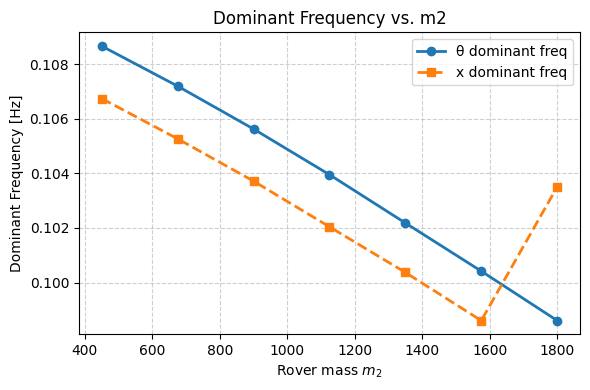

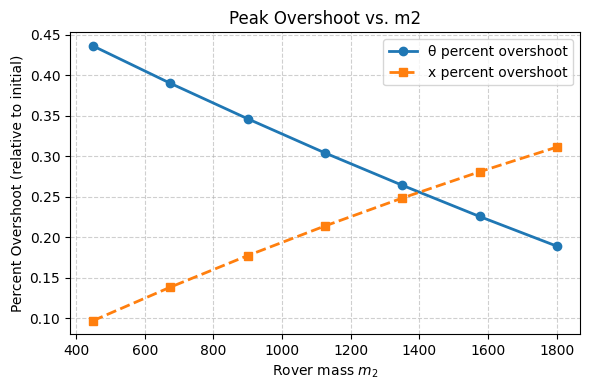

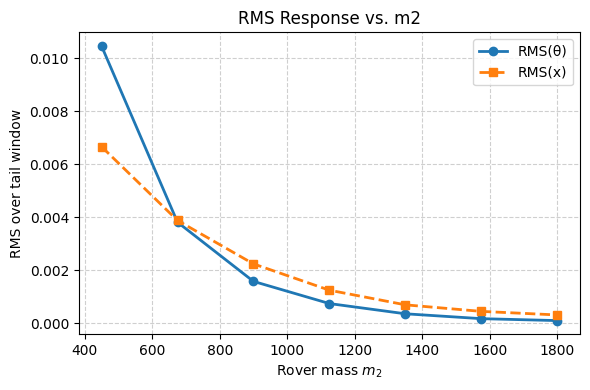

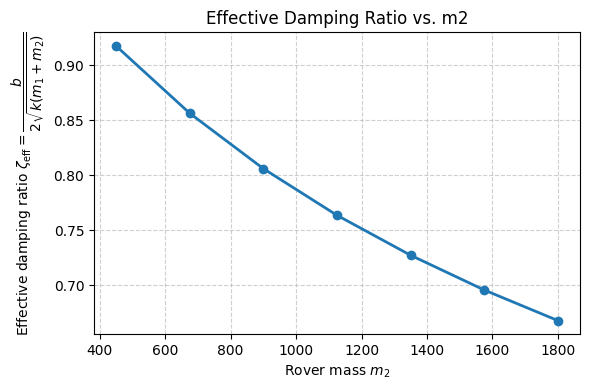

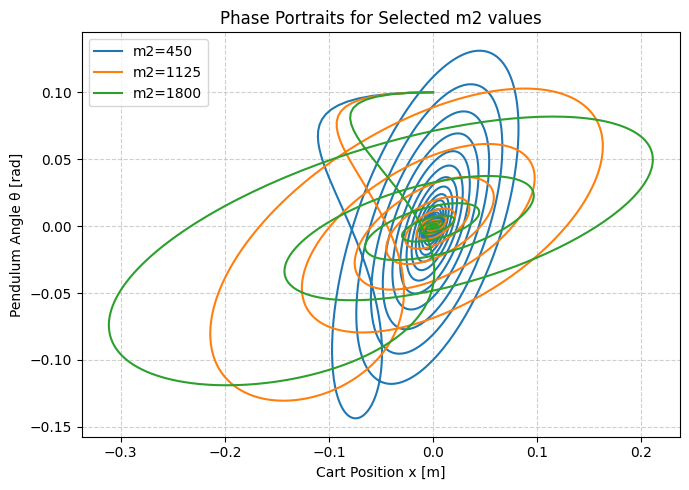

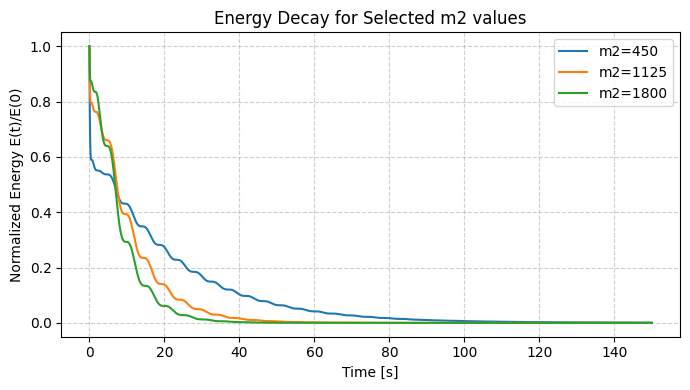

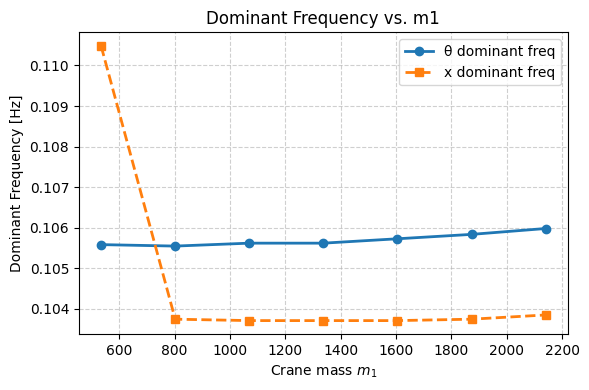

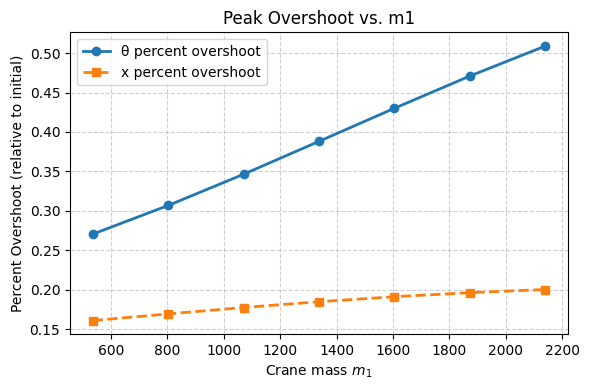

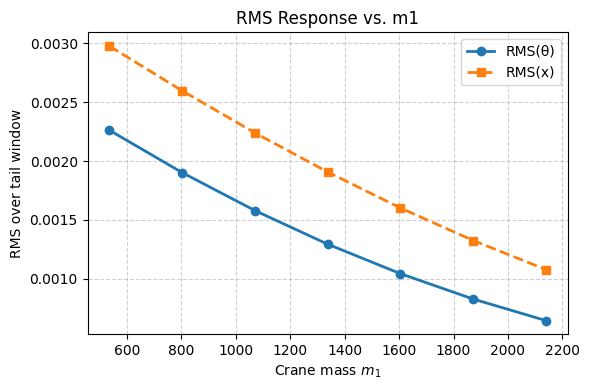

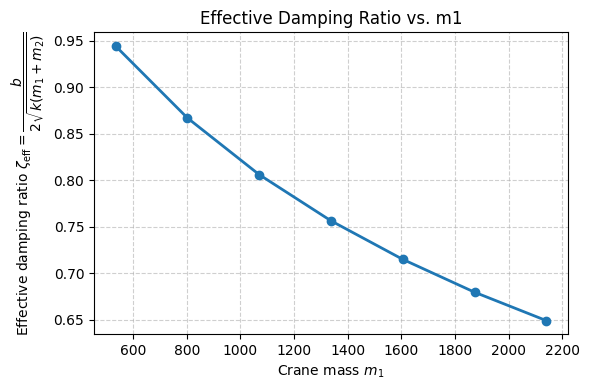

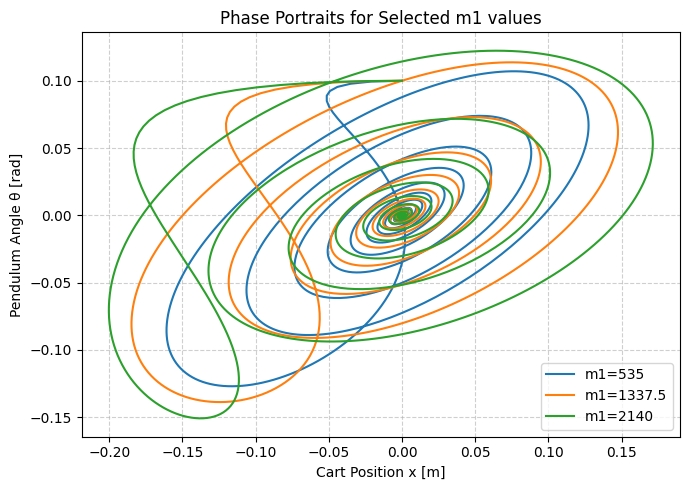

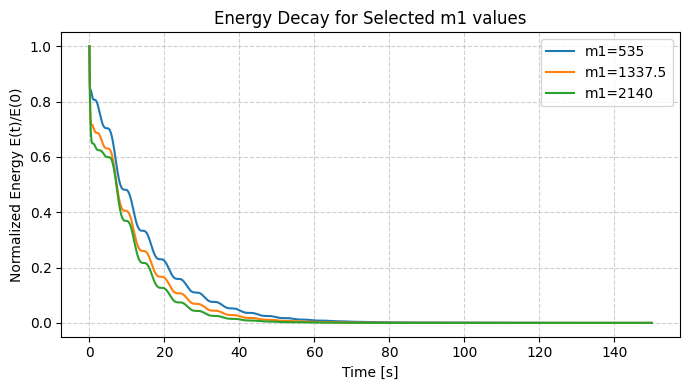

In [10]:
### Q4: Effect of Masses (m1, m2) on Stability & Transients

# Simulation controls
t_final = 150.0  # Longer tail for more behavior
frac_tail = 0.5
t_skip = 1.0

# Sweep m2 values
m2_vals = np.linspace(0.5*m2_0, 2.0*m2_0, 7)  # 0.5x .. 2x
results_m2 = sweep_mass_effects(
    'm2', m2_vals, ab3_solve, u0, dt, t_final,
    constants_base=constants, frac_window=frac_tail, t_skip_for_peaks=t_skip
)

plot_frequency_vs_mass(results_m2)
plot_overshoot_vs_mass(results_m2)
plot_rms_vs_mass(results_m2)
plot_zeta_vs_mass(results_m2)
# Pick 3 representative values
m2_list = [float(m2_vals[0]), float(m2_vals[len(m2_vals)//2]), float(m2_vals[-1])]
plot_phase_by_mass(results_m2, m2_list)
plot_energy_decay_examples_mass(results_m2, m2_list)

# Sweep m1 values
m1_vals = np.linspace(0.5*m1_0, 2.0*m1_0, 7)  # 0.5x .. 2x
results_m1 = sweep_mass_effects(
    'm1', m1_vals, ab3_solve, u0, dt, t_final,
    constants_base=constants, frac_window=frac_tail, t_skip_for_peaks=t_skip
)

# Figures
plot_frequency_vs_mass(results_m1)
plot_overshoot_vs_mass(results_m1)
plot_rms_vs_mass(results_m1)
plot_zeta_vs_mass(results_m1)
m1_list = [float(m1_vals[0]), float(m1_vals[len(m1_vals)//2]), float(m1_vals[-1])]
plot_phase_by_mass(results_m1, m1_list)
plot_energy_decay_examples_mass(results_m1, m1_list)
